In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
df = pd.read_csv('G:/Kumpulan Dataset/E_commerce_regression/Ecommerce Customers', sep = ',')

In [3]:
df

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...               Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...          Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...              Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...       DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[500 rows x 8 columns]

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Tidak terdapat data NaN dan Null

In [5]:
df.describe().T

count        mean        std         min         25%  \
Avg. Session Length   500.0   33.053194   0.992563   29.532429   32.341822   
Time on App           500.0   12.052488   0.994216    8.508152   11.388153   
Time on Website       500.0   37.060445   1.010489   33.913847   36.349257   
Length of Membership  500.0    3.533462   0.999278    0.269901    2.930450   
Yearly Amount Spent   500.0  499.314038  79.314782  256.670582  445.038277   

                             50%         75%         max  
Avg. Session Length    33.082008   33.711985   36.139662  
Time on App            11.983231   12.753850   15.126994  
Time on Website        37.069367   37.716432   40.005182  
Length of Membership    3.533975    4.126502    6.922689  
Yearly Amount Spent   498.887875  549.313828  765.518462

In [6]:
df.select_dtypes(include = 'number')

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[500 rows x 5 columns]

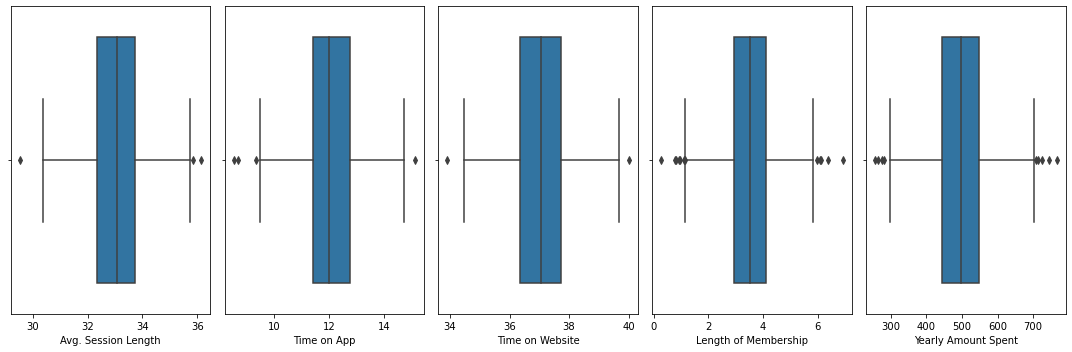

In [7]:
fig, axes = plt.subplots(1,5, figsize = (15,5))

for i, ax in zip(df.select_dtypes(include = 'number'), axes.flatten()):
    sns.boxplot(x = df[i], ax = ax)
    plt.tight_layout()

Handle Outlier

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

df.shape

(476, 8)

Disini saya tetap menggunakan outlier, meskipun data yang dimiliki sangat kecil. Saya tidak mengganti data pada nilai outliernya.
Pada label yang digunakan, saya akan memprediksi nilai pada kolom Yearly Amount Spent

# Univariate Analysis 

In [9]:
numerical_kolom = df.select_dtypes(include = 'number').columns.tolist()
categorical_kolom = df.select_dtypes(include = 'object').columns.tolist()

print("Numerical kolom : {}".format(numerical_kolom))
print("Categorical kolom : {}".format(categorical_kolom))

Numerical kolom : ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
Categorical kolom : ['Email', 'Address', 'Avatar']


In [10]:
df.nunique()

Email                   476
Address                 476
Avatar                  138
Avg. Session Length     476
Time on App             476
Time on Website         476
Length of Membership    476
Yearly Amount Spent     476
dtype: int64

Ternyata semua kolom (kecuali Avatar) memiliki nilai unique per row nya. Sehingga, saya akan langsung melakukan pengecekan ke data yang besifat numerical

## Numerical Kolom 

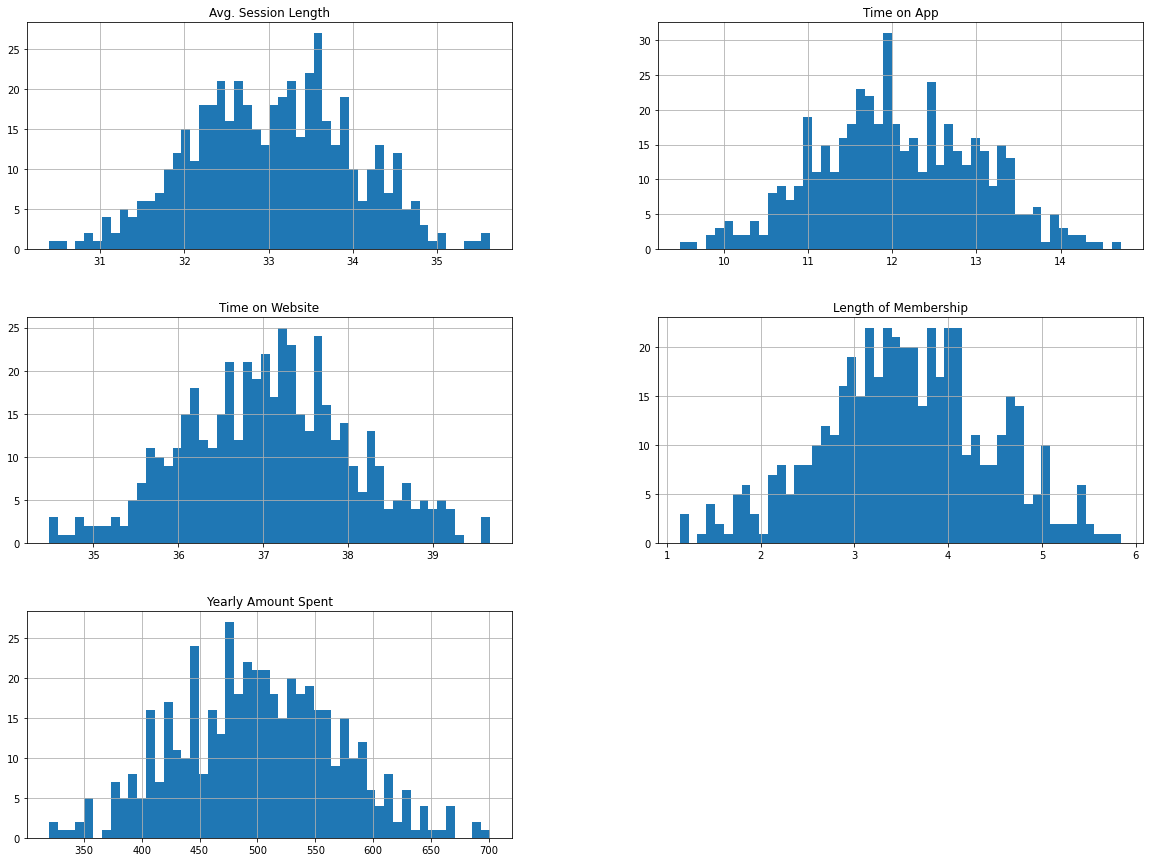

In [11]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

Kesimpulan yang didapat:
1. Waktu penggunaan di website lebih lama daripada penggunaan di aplikasi dengan rata-rata penggunaan sekitar 32-34 menit.
2. Namun, pada penggunaan aplikasi memberikan kenaikan yang positif pada amount spent
2. Skala lamanya membership di range 3 dan 4 bulan memiliki amount spent yang tinggi.
    
Sehingga, transaksi sering dilakukan pada penggunaan sistem aplikasi dengan waktu yang relatif singkat.

# Multivariate Analysis

## Numerical Kolom

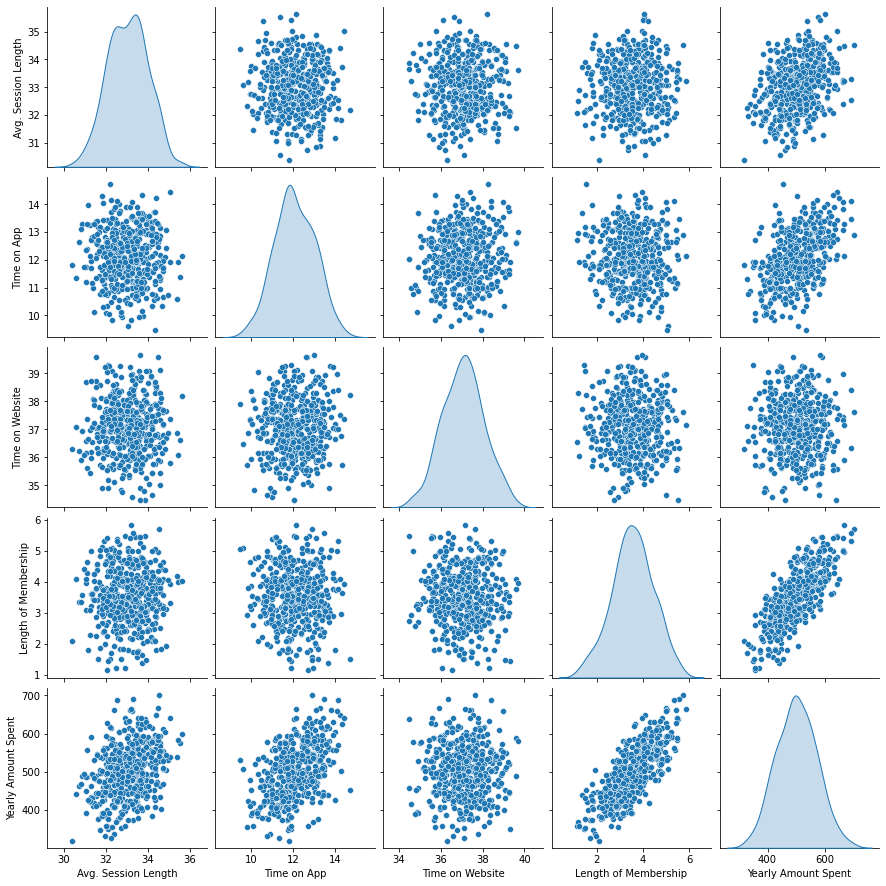

In [12]:
sns.pairplot(df, diag_kind = 'kde')

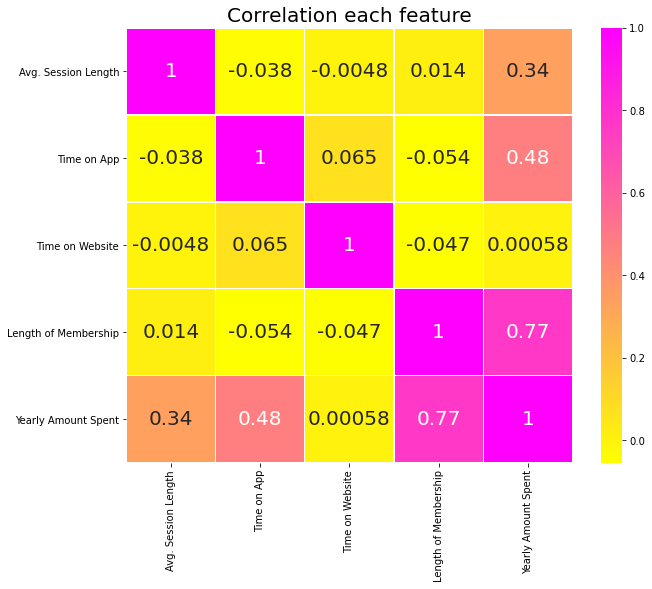

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, annot_kws = {'fontsize':20}, cmap = 'spring_r', linewidth = 0.3)
plt.title('Correlation each feature', fontsize = 20)
plt.show()

# Preprocessing

## Reduction Kolom 

Disini saya tidak menggunakan PCA dikarenakan tidak adanya korelasi yang tinggi antar fitur yang sama. 
Menurut perkiraan saya, Time On Website dengan Avg Session dapat dilakukan PCA. Namun dengan korelasi yang cukup rendah. 
Hal tersebut tidak perlu dilakukan dan yang saya gunakan hanyalah korelasi dengan rentang mendekati -1 dan +1

Untuk pembagian dataset, saya menggunakan 75% (Train) : 25% (Test) karena mengingat dataset yang kecil

In [14]:
X = df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 250)

In [16]:
print(f'Total of Dataset : {len(X)}')
print(f'Total of Train Dataset : {len(X_train)}')
print(f'Total of Test Dataset : {len(X_test)}')

Total of Dataset : 476
Total of Train Dataset : 357
Total of Test Dataset : 119


## Standardization 

In [17]:
kolom = ['Avg. Session Length', 'Time on App', 'Length of Membership']

In [18]:
scaler = StandardScaler()
scaler.fit(X_train[kolom])
X_train[kolom] = scaler.transform(X_train.loc[:, kolom])
X_train[kolom].head()

Avg. Session Length  Time on App  Length of Membership
142            -0.423634    -1.604585              0.413507
327            -1.982841     1.226550              1.201723
49             -1.421810    -0.715734             -0.379465
7              -0.286934     0.269296              0.989297
400             0.169070     1.019750              2.064852

In [19]:
X_test.loc[:,kolom] = scaler.transform(X_test.loc[:,kolom])

In [20]:
X_test

Avg. Session Length  Time on App  Length of Membership
103             0.448553     0.520704             -0.632822
36             -1.358016    -0.347123             -1.875764
315             1.568160     0.368077              0.517579
40             -0.990745    -0.369756              1.251783
57              1.358102    -1.572587             -0.250078
..                   ...          ...                   ...
195            -1.253437    -1.363189             -0.024356
76              0.572113    -0.556958             -0.778680
191            -0.314967    -0.378670             -0.257589
223             1.898242     0.024546              0.939660
111            -1.052059     0.090001              0.201058

[119 rows x 3 columns]

# Modeling 

In [21]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [22]:
print('Mean Squared Error pada data train : {}'.format(mean_squared_error(y_pred = model.predict(X_train), y_true = y_train)))

Mean Squared Error pada data train : 109.02462710253819


In [23]:
print('Mean Squared Error pada data train : {}'.format(mean_squared_error(y_pred = model.predict(X_test), y_true = y_test)))

Mean Squared Error pada data train : 92.0247400277961


Disini saya akan mencoba parameter optimasi parameter kernel linear yaitu C

In [24]:
for c in range(1, 21):
    models = SVR(kernel = 'linear', C = c)
    models.fit(X_train, y_train)
    
    print('Mean Squared Error pada data train : {} (C = {})'.format(mean_squared_error(y_pred = models.predict(X_train), y_true = y_train).round(2), c))

Mean Squared Error pada data train : 109.02 (C = 1)
Mean Squared Error pada data train : 104.96 (C = 2)
Mean Squared Error pada data train : 104.43 (C = 3)
Mean Squared Error pada data train : 103.53 (C = 4)
Mean Squared Error pada data train : 103.51 (C = 5)
Mean Squared Error pada data train : 103.43 (C = 6)
Mean Squared Error pada data train : 103.37 (C = 7)
Mean Squared Error pada data train : 103.24 (C = 8)
Mean Squared Error pada data train : 103.22 (C = 9)
Mean Squared Error pada data train : 103.21 (C = 10)
Mean Squared Error pada data train : 103.15 (C = 11)
Mean Squared Error pada data train : 103.08 (C = 12)
Mean Squared Error pada data train : 103.08 (C = 13)
Mean Squared Error pada data train : 103.07 (C = 14)
Mean Squared Error pada data train : 103.07 (C = 15)
Mean Squared Error pada data train : 103.07 (C = 16)
Mean Squared Error pada data train : 103.07 (C = 17)
Mean Squared Error pada data train : 103.07 (C = 18)
Mean Squared Error pada data train : 103.07 (C = 19)
Me

Hasil MSE terkecil dihasilkan ketika nilai C di rentang 14-20 dengan nilai 103.07.
Saya akan menghitung nilai MSE dengan X_test

In [25]:
for c in range(1, 21):
    models = SVR(kernel = 'linear', C = c)
    models.fit(X_train, y_train)
    
    print('Mean Squared Error pada data train : {} (C = {})'.format(mean_squared_error(y_pred = models.predict(X_test), y_true = y_test).round(2), c))

Mean Squared Error pada data train : 92.02 (C = 1)
Mean Squared Error pada data train : 91.78 (C = 2)
Mean Squared Error pada data train : 91.72 (C = 3)
Mean Squared Error pada data train : 91.15 (C = 4)
Mean Squared Error pada data train : 91.15 (C = 5)
Mean Squared Error pada data train : 91.18 (C = 6)
Mean Squared Error pada data train : 90.9 (C = 7)
Mean Squared Error pada data train : 90.99 (C = 8)
Mean Squared Error pada data train : 90.88 (C = 9)
Mean Squared Error pada data train : 90.91 (C = 10)
Mean Squared Error pada data train : 91.03 (C = 11)
Mean Squared Error pada data train : 91.07 (C = 12)
Mean Squared Error pada data train : 91.07 (C = 13)
Mean Squared Error pada data train : 91.09 (C = 14)
Mean Squared Error pada data train : 91.09 (C = 15)
Mean Squared Error pada data train : 91.12 (C = 16)
Mean Squared Error pada data train : 91.12 (C = 17)
Mean Squared Error pada data train : 91.12 (C = 18)
Mean Squared Error pada data train : 91.12 (C = 19)
Mean Squared Error pad

In [26]:
x_prediksi_nilai_rill = X_test.iloc[0:3].copy()
y_prediksi_nilai_rill = y_test.iloc[0:3].copy()

In [27]:
x_prediksi_nilai_rill

Avg. Session Length  Time on App  Length of Membership
103             0.448553     0.520704             -0.632822
36             -1.358016    -0.347123             -1.875764
315             1.568160     0.368077              0.517579

In [28]:
y_prediksi_nilai_rill

103    492.105052
36     347.776927
315    584.105885
Name: Yearly Amount Spent, dtype: float64

Model tanpa optimizer nilai C

In [29]:
model.predict(x_prediksi_nilai_rill)

array([496.10880356, 354.10284687, 579.16607765])

Model dengan optimizer nilai C dengan mse terkecil, yaitu C = 7-9

In [30]:
models.predict(x_prediksi_nilai_rill)

array([495.38143422, 349.93834044, 580.72042379])

In [31]:
data = y_prediksi_nilai_rill.values, model.predict(x_prediksi_nilai_rill), models.predict(x_prediksi_nilai_rill)

In [32]:
df_evaluation = pd.DataFrame(data = data, index = ['Nilai Rill', 'Tanpa C', 'Dengan C'])

In [33]:
df_evaluation.T

Nilai Rill     Tanpa C    Dengan C
0  492.105052  496.108804  495.381434
1  347.776927  354.102847  349.938340
2  584.105885  579.166078  580.720424

Terdapat beberapa kernel pada Support Vector antara lain, yaitu linear, RBF, polynominal, sigmoid.
Pada kasus diatas, kernel linear sudah dapat memberikan hasil yang mendekati dengan hasil sebenarnya dengan bantuan parameternya. Hal ini saya perkirakan karena jumlah N-fitur yang lebih rendah daripada jumlah N-rows pada data.